## House Price Prediction

## Case Study: House Price Prediction

### Background

Lagos is one of the fastest-growing cities in Africa, with a rapidly expanding population and a booming real estate market. The city's housing market is highly competitive, with a wide range of properties available at varying prices. However, with the high demand for housing, it can be challenging for buyers and sellers to accurately determine the fair market value of a property.

### Objective

The objective of this case study is to help Cressida Homes, a new entrant into the Real Estate Market, develop a machine learning model that can accurately predict the price of a house in Lagos based on its features, such as size, number of bedrooms, and amenities.

### Data
The data used in this case study is a publicly available dataset from Kaggle, which contains information on various properties in Lagos, including their location, size, number of bedrooms, and price. The dataset contains over 545 records and 13 variables.

### Methodology

The methodology used in this case study involves the following steps:

Data cleaning and preprocessing: The first step is to clean and preprocess the data, including handling missing values, removing outliers, and transforming variables as necessary.

Exploratory data analysis: Next, I performed exploratory data analysis to gain insights into the data, such as identifying trends and patterns, and identifying correlations between variables.

Feature engineering: Based on the insights gained from the exploratory data analysis, I performed feature engineering to select the most relevant features for predicting house prices and transform them as necessary.

Model selection and training: I then selected a suitable machine learning algorithm for predicting house prices, such as linear regression or a decision tree regressor or random forest regressor and train the model on the preprocessed data.

Model evaluation and fine-tuning: I evaluated the performance of the model using various metrics, such as mean absolute error and mean squared error, and fine-tune the model as necessary to improve its accuracy.

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

### Load the Data

In [2]:
# Load dataset

house_data = pd.read_csv(r"Cressida_Housing_Data.csv")
house_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,2835000,4350,3,1,2,no,no,no,yes,no,1,no,unfurnished
1,5250000,9800,4,2,2,yes,yes,no,no,no,2,no,semi-furnished
2,4543000,4100,2,2,1,yes,yes,yes,no,no,0,no,semi-furnished
3,4200000,4600,3,2,2,yes,no,no,no,yes,1,no,semi-furnished
4,2975000,4352,4,1,2,no,no,no,no,no,1,no,unfurnished


### Data Inspection and Cleaning

In [3]:
# Descriptive statistics

house_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
price,545.0,NaN,NaN,NaN,4766729.247706,1870439.615657,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,NaN,NaN,NaN,5150.541284,2170.141023,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,NaN,NaN,NaN,2.965138,0.738064,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,NaN,NaN,NaN,1.286239,0.50247,1.0,1.0,1.0,2.0,4.0
stories,545.0,NaN,NaN,NaN,1.805505,0.867492,1.0,1.0,2.0,2.0,4.0
mainroad,545,2,yes,468,NaN,NaN,NaN,NaN,NaN,NaN,NaN
guestroom,545,2,no,448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
basement,545,2,no,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hotwaterheating,545,2,no,520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
airconditioning,545,2,no,373,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
house_data.describe().astype(int)

,price,area,bedrooms,bathrooms,stories,parking
count,545,545,545,545,545,545
mean,4766729,5150,2,1,1,0
std,1870439,2170,0,0,0,0
min,1750000,1650,1,1,1,0
25%,3430000,3600,2,1,1,0
50%,4340000,4600,3,1,2,0
75%,5740000,6360,3,2,2,1
max,13300000,16200,6,4,4,3


In [6]:
# Information about our columns

house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
# Check for missing values

house_data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

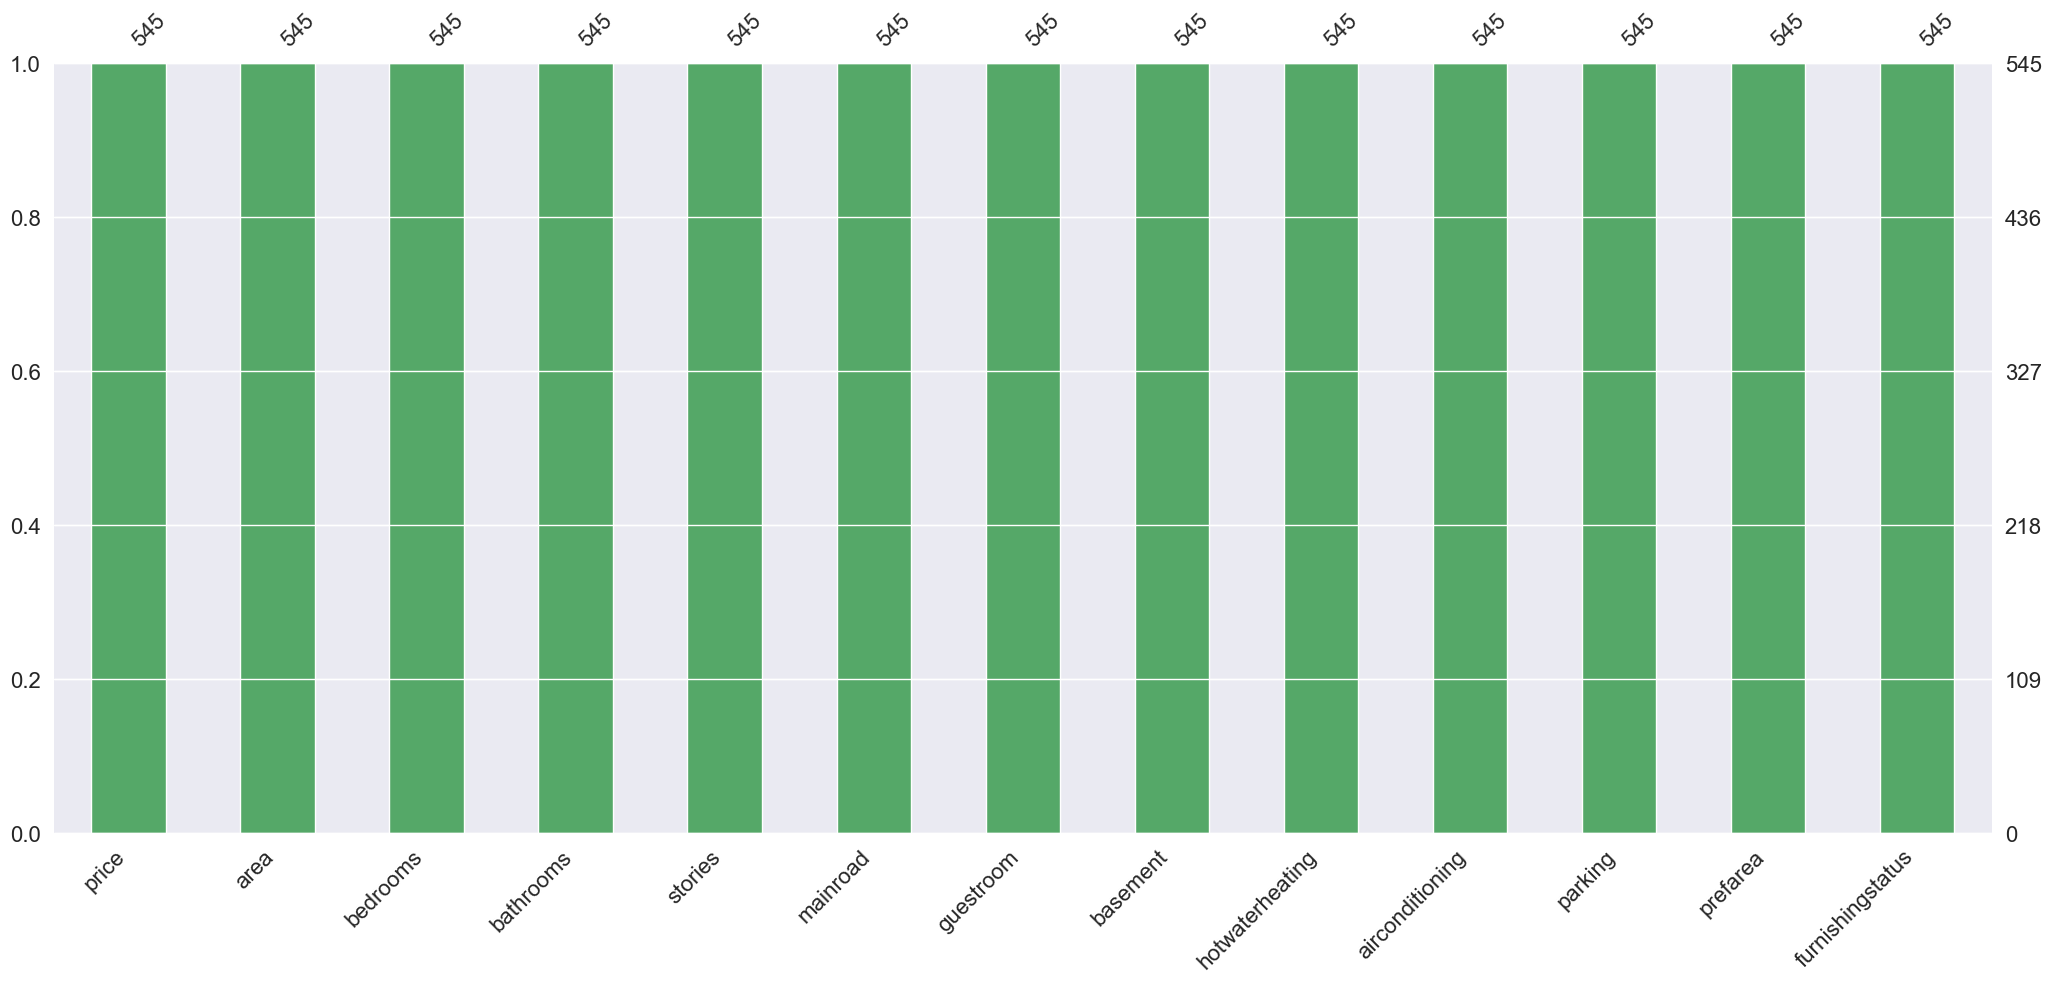

In [59]:
import missingno as msno

# Visualizing the missing values for a clearer view
msno.bar(house_data, color='g');

- There's no missing value in the dataset

In [8]:
# Check for duplicates


house_data.duplicated().sum()

0

### EDA

<Figure size 4000x2000 with 0 Axes>

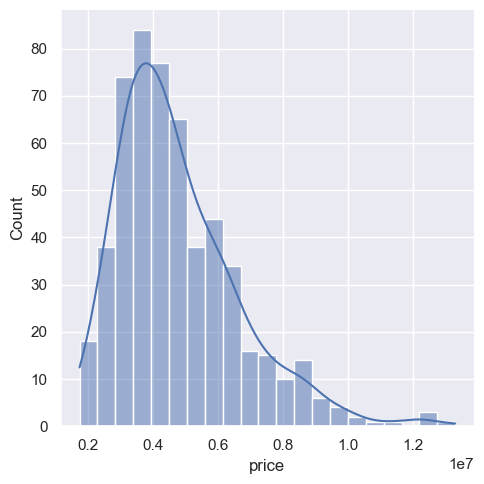

In [9]:
# Check Price distribution

plt.figure(figsize=(40,20))
this_plot = sns.displot(house_data['price'], kde='True')


- The price distribution is positively skewed, this means there's large occurence of low prices in the data compared to the higher prices.

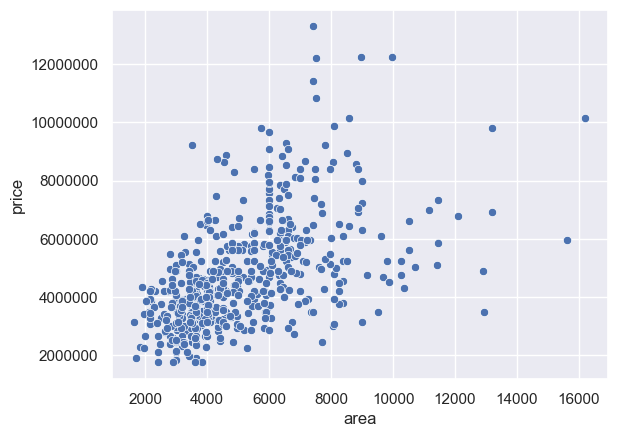

In [10]:
# Check for relationship between area and price

sns.scatterplot(x='area',y='price', data=house_data)
plt.ticklabel_format(style='plain')

- The scatterplot chart shows we more houses clustered around area of 2000 to 8000 and between the price of 2000000 and 8000000 in the dataset
- It also shows there are outliers in the dataset, this means there are houses with smaller area and higher price and also bigger area with lower price

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

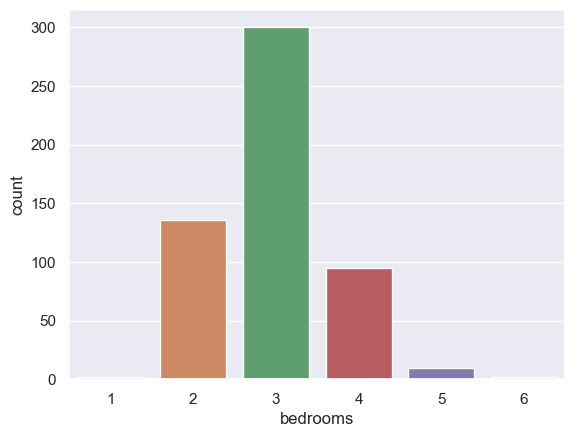

In [11]:
# Check for spread of rooms

sns.countplot(x='bedrooms', data=house_data)


- The column chart shows the count of number of different bedrooms we have in the dataset, we have more number of 3bedrooms, followed by 2bedrooms and the third highest is 4bedrooms.
- There's almosy no 1 bedrooms or 6bedrooms in the data.

In [12]:
house_data['bedrooms'].value_counts()

3    300
2    136
4     95
5     10
6      2
1      2
Name: bedrooms, dtype: int64

<AxesSubplot:xlabel='stories', ylabel='count'>

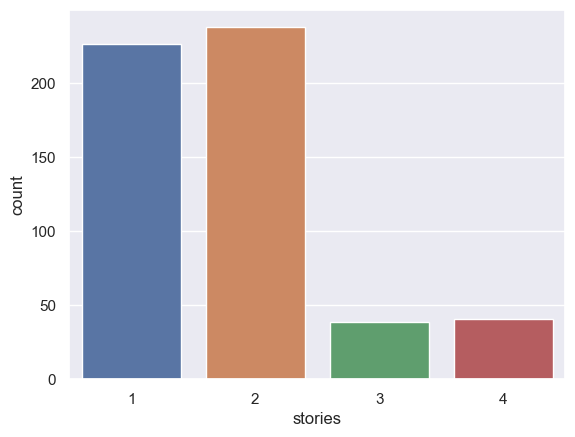

In [13]:
# Check for spread of floors/stories

sns.countplot(x='stories', data=house_data)

- The chart shows the spread of rooms in the stories,floors, so we have more rooms in the 2stories and 1stories compared to 3&4stories

In [14]:
house_data['stories'].value_counts()

2    238
1    227
4     41
3     39
Name: stories, dtype: int64

<AxesSubplot:xlabel='parking', ylabel='count'>

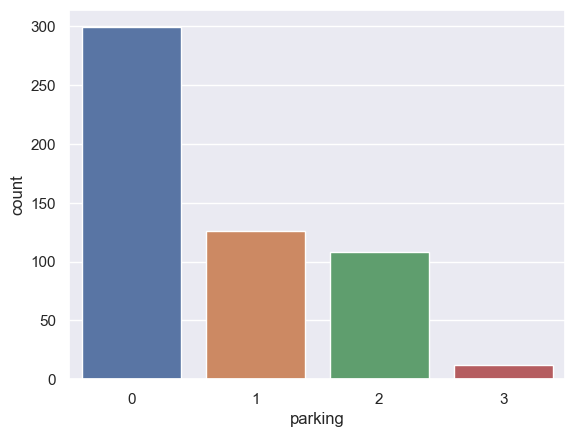

In [16]:
# Check for spread of parking spaces

sns.countplot(x='parking', data=house_data)

- This shows there are more houses with zero parking space

In [15]:
house_data['parking'].value_counts()

0    299
1    126
2    108
3     12
Name: parking, dtype: int64

<AxesSubplot:xlabel='hotwaterheating', ylabel='count'>

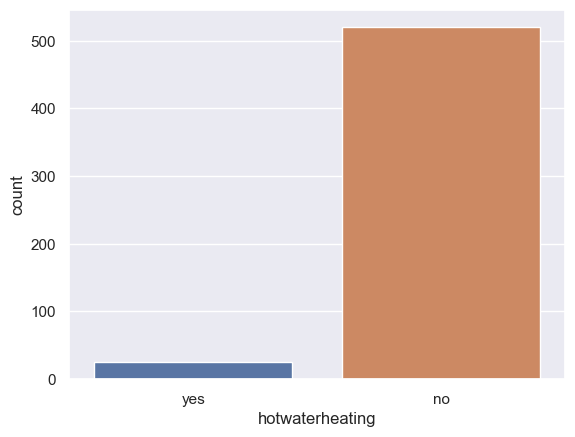

In [17]:
# How many houses have hot water heating?

sns.countplot(x='hotwaterheating', data=house_data)

- This chart shows there are more houses without hotwater heating in the dataset

In [18]:
house_data['hotwaterheating'].value_counts()

no     520
yes     25
Name: hotwaterheating, dtype: int64

<AxesSubplot:xlabel='airconditioning', ylabel='count'>

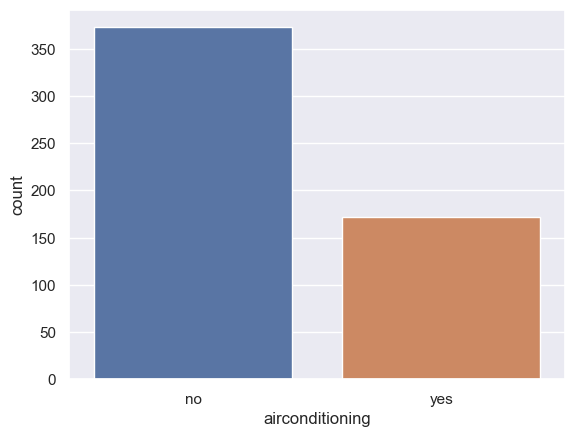

In [19]:
# How many houses have airconditioning?

sns.countplot(x='airconditioning', data=house_data)

- This shows there are more houses without airconditioning 

In [20]:
house_data['airconditioning'].value_counts()

no     373
yes    172
Name: airconditioning, dtype: int64

<AxesSubplot:xlabel='prefarea', ylabel='count'>

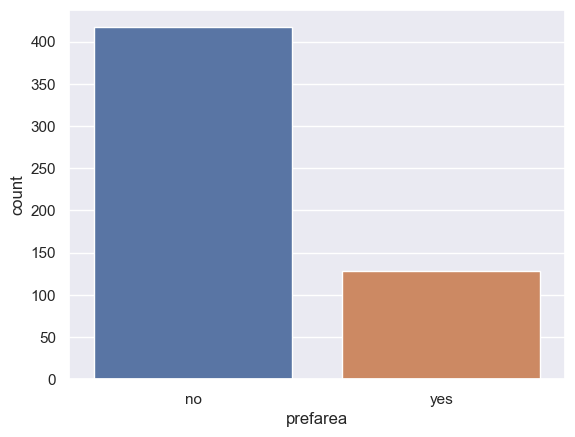

In [21]:
# How many houses are in preferred areas?

sns.countplot(x='prefarea', data=house_data)

- This shows there are more house in the not preferred area, according to the dataset

In [22]:
house_data['prefarea'].value_counts()

no     417
yes    128
Name: prefarea, dtype: int64

<AxesSubplot:xlabel='furnishingstatus', ylabel='count'>

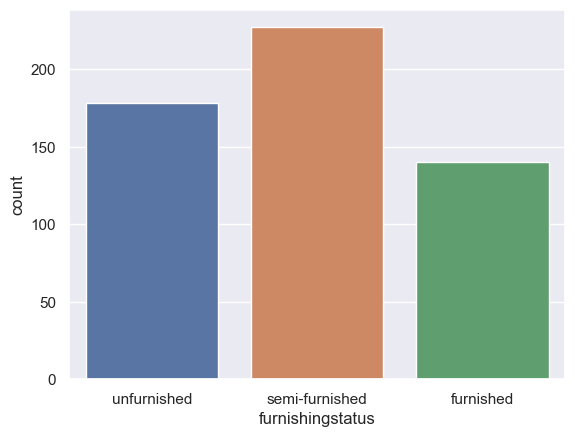

In [23]:
# What is the furnishing status?

sns.countplot(x='furnishingstatus', data=house_data)

- This chart here shows we have more houses that are semi-furnished, followed almost closely by unfurnished and then few furnished houses in the dataset

In [24]:
house_data['furnishingstatus'].value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

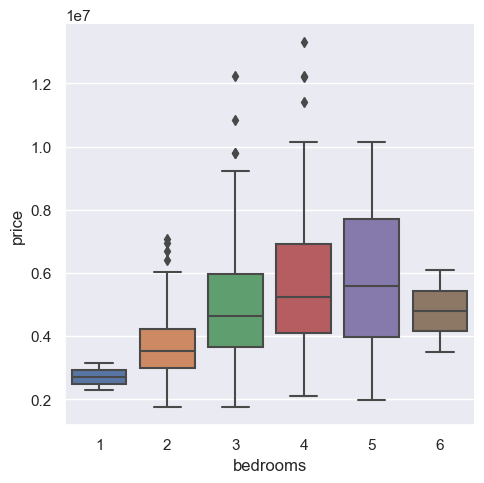

In [25]:
# Distribution of bedrooms and price

sns.catplot(data=house_data, x='bedrooms', y='price', kind="box")

- This chart shows distribution of bedrooms and prices, we can almost say the higher the number of bedrooms the higher the price but we have putliers in the dataset, bedrooms 2,3,4 and 6 confirmed that.

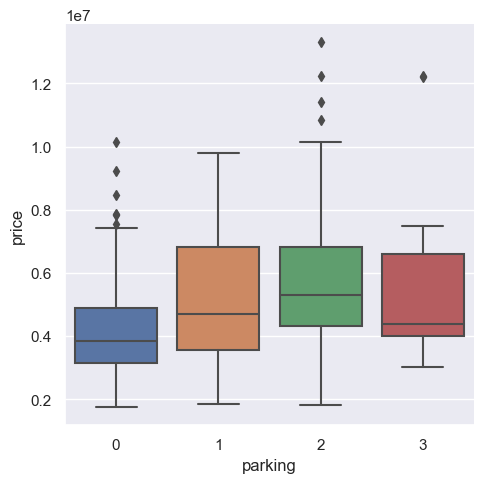

In [26]:
# Distribution of parking and price

sns.catplot(data=house_data, x='parking', y='price', kind="box")

- This chart shows the distribution of rooms with parking space, we have some rooms without parking space with relatively high prices. 
- Also the set of bedrooms with 2 parking space have higher price compared to the set of bedrooms with 3 parking space
- Again this confirmed that we have outliers in the dataset

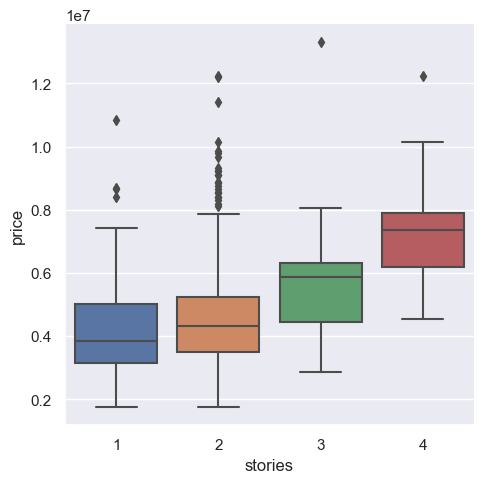

In [60]:
# Distribution of stories and price

sns.catplot(data=house_data, x='stories', y='price', kind="box")

- This chart shows the distribution of stories and price. The higher the story the higher the price, but due to the outliers its not 100% right to say that.
- Some bedrooms in stories 1 have higher prices compared to some bedrooms in stories 3 and we have some bedrooms in stories 3 with relatively high price compared to stories 4.

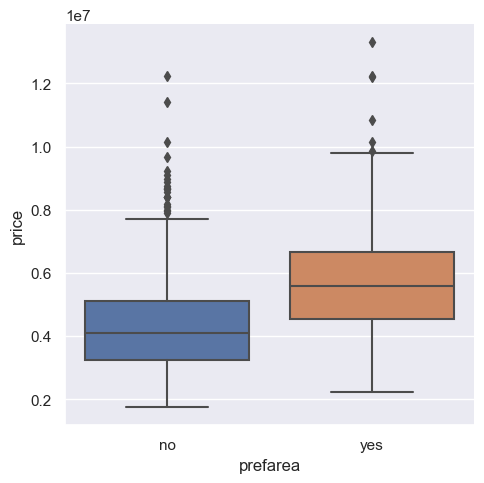

In [28]:
# Distribution of prefarea and price

sns.catplot(data=house_data, x='prefarea', y='price', kind="box")

- Distribution of preferred area and prices, we have houses in the preferred area more expensive compared to the not-preferred area

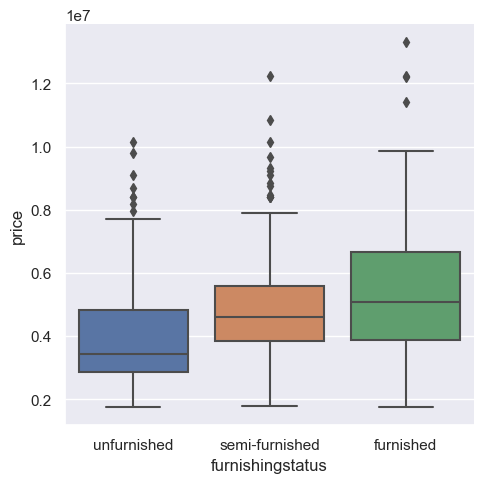

In [29]:
# Distribution of furnishing status and price

sns.catplot(data=house_data, x='furnishingstatus', y='price', kind="box")

- The distribution of price and furnish-status, this showss the furnised houses are more expensive compared to the semi-furnished and unfurnished regarless of the outliers

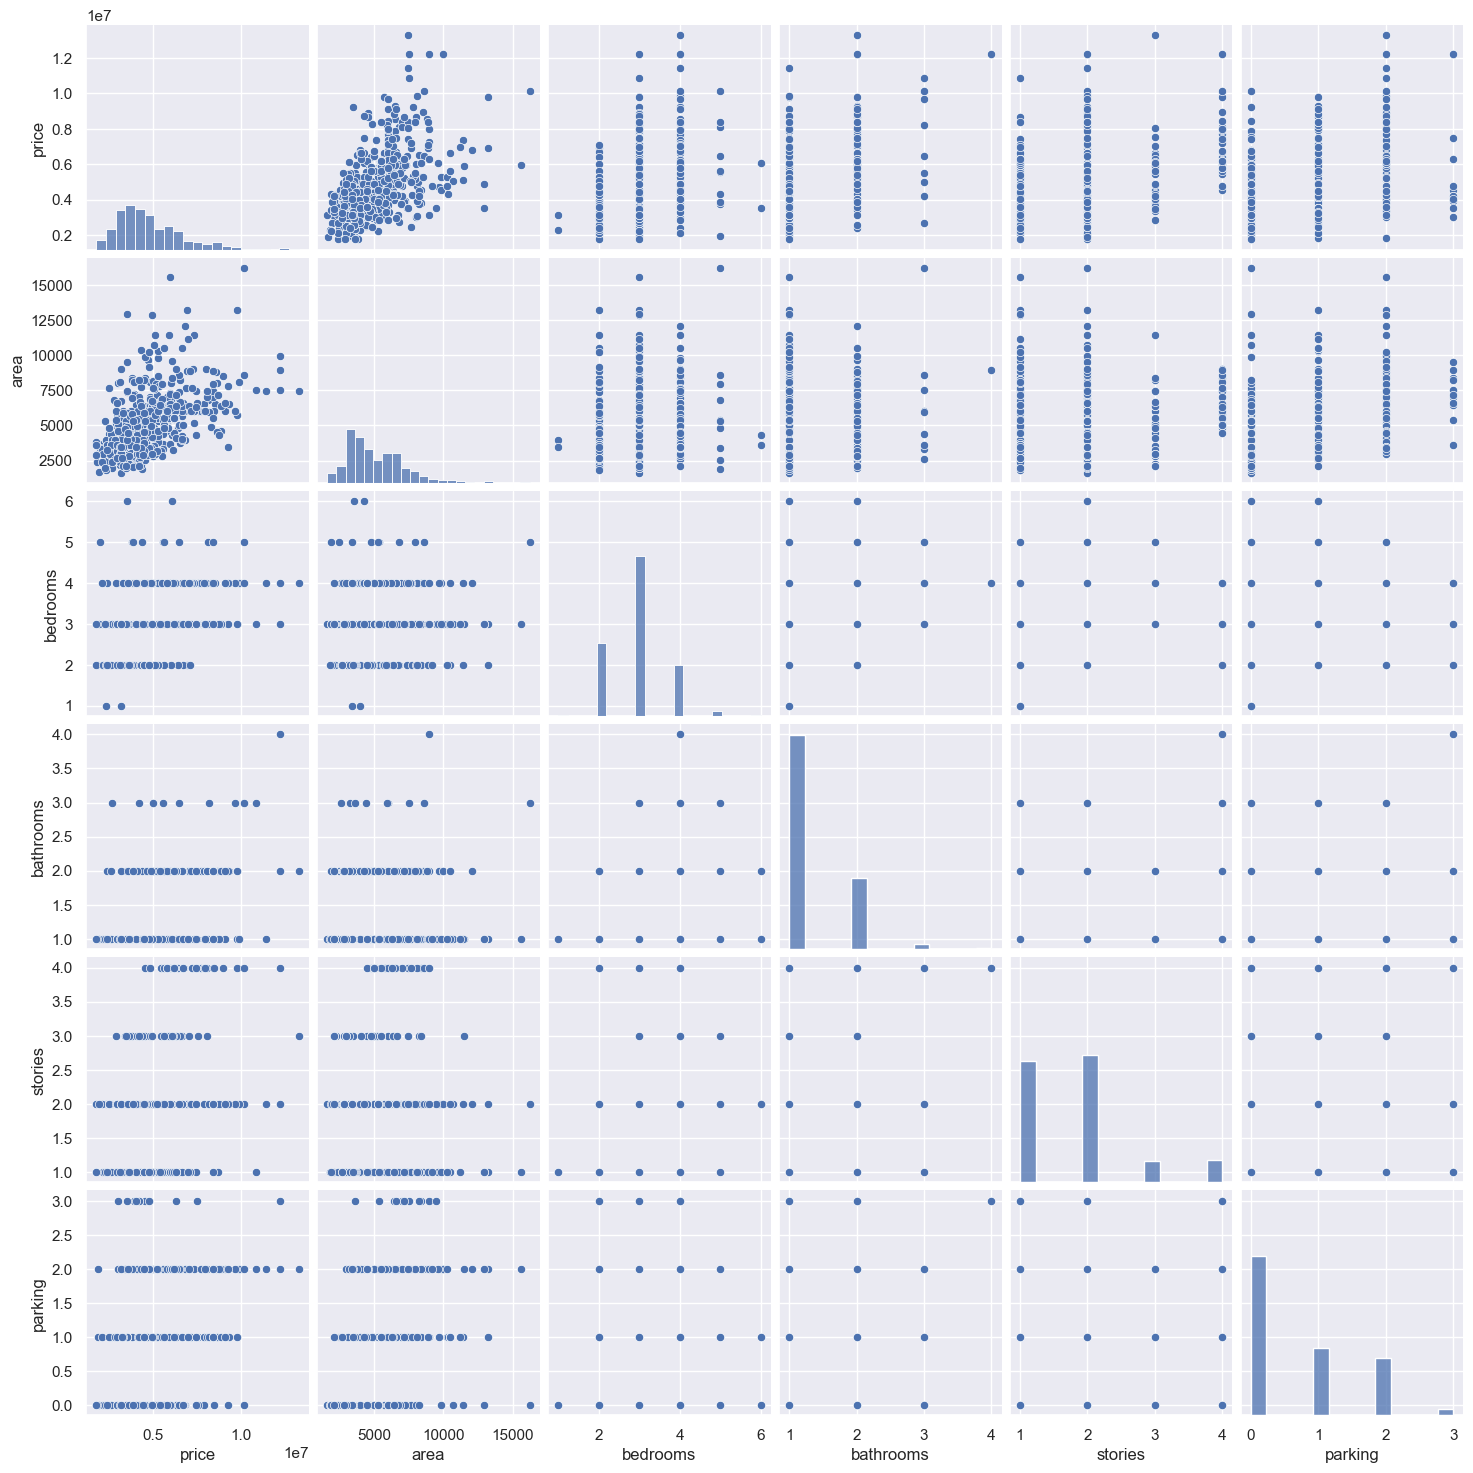

In [30]:
sns.pairplot(house_data)

- This is a pairplot distribution shows the relaitonship and trends between all the features in the dataset. 

<AxesSubplot:>

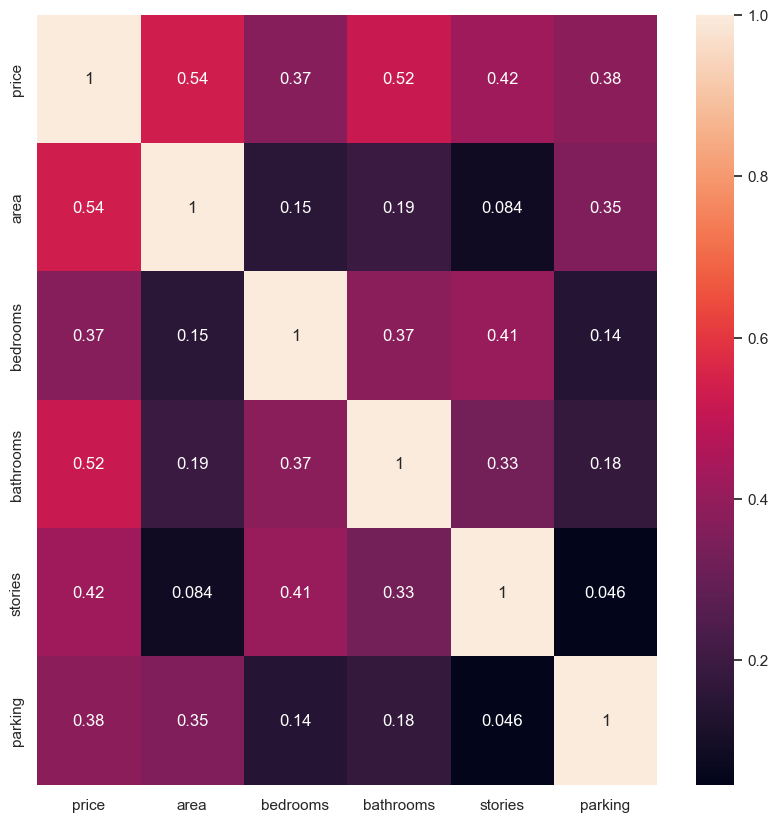

In [31]:
# Check for correlation in our features


plt.figure(figsize=(10,10))
sns.heatmap(house_data.corr(),annot=True)

- The heatmap shows the correlation between the features. The closer the numbers to 1, the stronger the correlation between the features. 
- There's a strong correlation between the price of the houses and the area they are located.
- There's also a strong correlation between the price of the houses and the number of bathrooms in the rooms

### Splitting the data

In [32]:
# Independent variables -- Drop the Target veriable from the Independent variables

X = house_data.drop('price', axis=1)
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,4350,3,1,2,no,no,no,yes,no,1,no,unfurnished
1,9800,4,2,2,yes,yes,no,no,no,2,no,semi-furnished
2,4100,2,2,1,yes,yes,yes,no,no,0,no,semi-furnished
3,4600,3,2,2,yes,no,no,no,yes,1,no,semi-furnished
4,4352,4,1,2,no,no,no,no,no,1,no,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,6325,3,1,4,yes,no,no,no,yes,1,no,unfurnished
541,4510,4,1,2,yes,no,no,no,yes,2,no,semi-furnished
542,4500,4,2,2,yes,no,yes,no,no,2,no,furnished
543,5300,5,2,2,yes,no,no,no,no,0,no,semi-furnished


In [33]:
# Encoding- Uisng one-hot encoding which converts categorical columns to numerical

X = pd.get_dummies(X)
X

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,4350,3,1,2,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,1
1,9800,4,2,2,2,0,1,0,1,1,0,1,0,1,0,1,0,0,1,0
2,4100,2,2,1,0,0,1,0,1,0,1,1,0,1,0,1,0,0,1,0
3,4600,3,2,2,1,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0
4,4352,4,1,2,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,6325,3,1,4,1,0,1,1,0,1,0,1,0,0,1,1,0,0,0,1
541,4510,4,1,2,2,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0
542,4500,4,2,2,2,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0
543,5300,5,2,2,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0


In [34]:
# Target variables 

y = house_data['price']
y

0      2835000
1      5250000
2      4543000
3      4200000
4      2975000
        ...   
540    7420000
541    4480000
542    3570000
543    3850000
544    7455000
Name: price, Length: 545, dtype: int64

### Train-Test Split

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(436, 20)
(109, 20)
(436,)
(109,)


In [37]:
# Import algorithms


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



### Linear Regression Model

In [38]:
# Initialise/Create and instance of Linear Regression model

lr = LinearRegression()

# Fit your model
lr.fit(X_train, y_train)


# Make predictions
lr_pred = lr.predict(X_test)



In [43]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
    

In [44]:
# Evaluate the performance of my model

mae = mean_absolute_error(y_test, lr_pred)
mse = mean_squared_error(y_test, lr_pred)
r_square = r2_score(y_test, lr_pred)

print(mae)
print(mse)
print(r_square)

733894.4525559898
1121668389130.9568
0.6334772718187529


### Using other regression models

In [45]:
dr = DecisionTreeRegressor(random_state=42)
rr = RandomForestRegressor(random_state=42)


#create list of your model names
models = [lr, dr, rr]

In [50]:
#create function to train a model and evaluate metrics
def trainer(model,X_train,y_train,X_test,y_test):
    #fit your model
    model.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_test)
    #print evaluation metric
    print('\nfor {}, Mean Absolute Error is {} \n'.format(model.__class__.__name__,mean_absolute_error(prediction,y_test)))
    print('\nfor {}, Mean Squared Error is {} \n'.format(model.__class__.__name__,mean_squared_error(prediction,y_test)))
    print('\nfor {}, R_Square is {} \n'.format(model.__class__.__name__,r2_score(prediction,y_test)))
    print('------------------------------------------------------------------------------------------------------')
    #print(classification_report(prediction,y_valid)) #use this later
    

In [52]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_test,y_test)
    


for LinearRegression, Mean Absolute Error is 733894.4525559898 


for LinearRegression, Mean Squared Error is 1121668389130.9568 


for LinearRegression, R_Square is 0.40119374523585305 

------------------------------------------------------------------------------------------------------

for DecisionTreeRegressor, Mean Absolute Error is 990150.0 


for DecisionTreeRegressor, Mean Squared Error is 1791025366720.1836 


for DecisionTreeRegressor, R_Square is 0.33932949822173797 

------------------------------------------------------------------------------------------------------

for RandomForestRegressor, Mean Absolute Error is 767597.6920489297 


for RandomForestRegressor, Mean Squared Error is 1155239788117.087 


for RandomForestRegressor, R_Square is 0.39566609792024987 

------------------------------------------------------------------------------------------------------


### Cross Validation

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
models = [lr, dr, rr]




#create function to train a model and evaluate r2
def trainer_with_cv(model,X_train,y_train,X_test,y_test):
    scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=5)
    #print evaluation metric
    print('\nFor {}, Cross-Validation Scores are  {} \n'.format(model.__class__.__name__,scores))
    print('------------------------------------------------------------------------------------------------------')


In [55]:
for model in models:
    trainer_with_cv(model,X_train,y_train,X_test,y_test)


For LinearRegression, Cross-Validation Scores are  [0.60655378 0.59677981 0.64522106 0.72765523 0.73719741] 

------------------------------------------------------------------------------------------------------

For DecisionTreeRegressor, Cross-Validation Scores are  [0.42879448 0.10738423 0.19531318 0.34582061 0.28830184] 

------------------------------------------------------------------------------------------------------

For RandomForestRegressor, Cross-Validation Scores are  [0.61273149 0.61666498 0.49175643 0.71477668 0.58322109] 

------------------------------------------------------------------------------------------------------


### Using K-Fold Cross Validation 

In [56]:
from sklearn.model_selection import KFold
from numpy import mean
from numpy import std

    
# Perform a 10-Fold split and evaluate mean cross evaluation score    
folds = KFold(n_splits=10, random_state=1, shuffle=True)

def trainer_with_kfold_cv(model,X_train,y_train,X_test,y_test):
    '''Cross validation function. Expects a model,'''
    # evaluate model
    scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=folds, n_jobs=-1)
    # cross validation scores
    print('\nFor {}, Cross-Validation Scores are  {} \n'.format(model.__class__.__name__,scores))
    # report performance
    print('R_Square: %.3f' % (mean(scores)))   



In [57]:
for model in models:
    trainer_with_kfold_cv(model,X_train,y_train,X_test,y_test)


For LinearRegression, Cross-Validation Scores are  [0.74080717 0.51459248 0.77382824 0.57659263 0.68731296 0.68356068
 0.53122189 0.62940424 0.65690655 0.64251035] 

R_Square: 0.644

For DecisionTreeRegressor, Cross-Validation Scores are  [-0.07592017 -0.26100254  0.35827197 -0.06365284  0.16555129  0.22347884
  0.19904897  0.03356706  0.00332394  0.36055089] 

R_Square: 0.094

For RandomForestRegressor, Cross-Validation Scores are  [0.73803085 0.31390669 0.66298987 0.5970327  0.61394647 0.62312019
 0.48003702 0.49860253 0.51471833 0.64795052] 

R_Square: 0.569


# Conclusion

- overall Linear Regression is the best performing model, as it has the best metrics from the lot. 